In [85]:
%reload_ext autoreload
%autoreload 2
from airplane_system import AirplaneSystem
import numpy as np
from proj_helpers import *
from rrt import *
import time
from IPython.display import HTML

In [63]:
# 6D state (x, z, V, gamma, theta, q)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane = AirplaneSystem()
input_trajectory, state_trajectory_approx, time_array = airplane.trajOpt(x0, dircol=0, second_pass=False)
# input_trajectory_2, state_trajectory_approx_2, time_array_2 = airplane.trajOpt(x0, dircol=1, second_pass=True)


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 12.8 seconds **

t_f computed: 16.667 seconds
cost computed: 3108.372


trajectory-following simulations finished


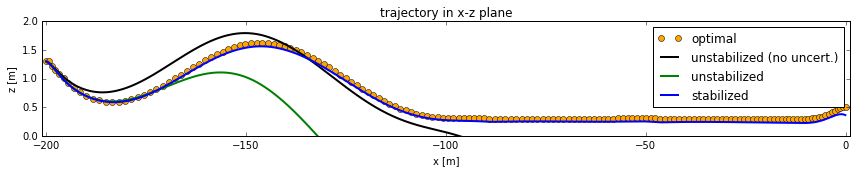

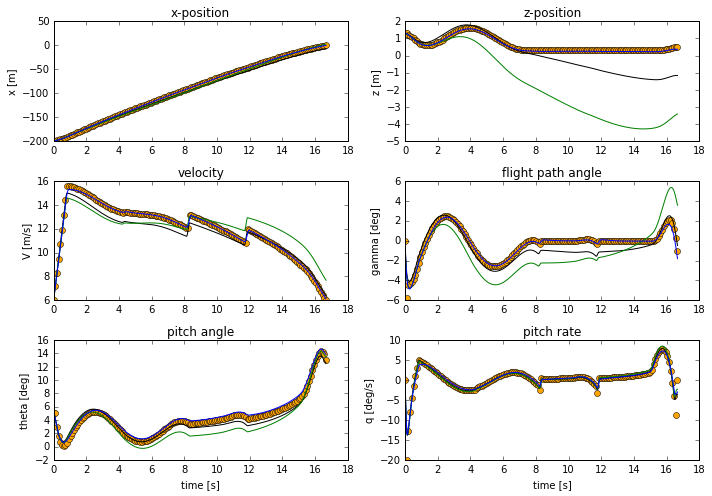

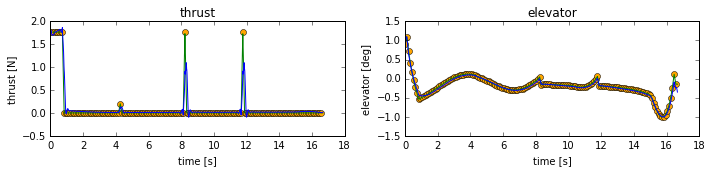

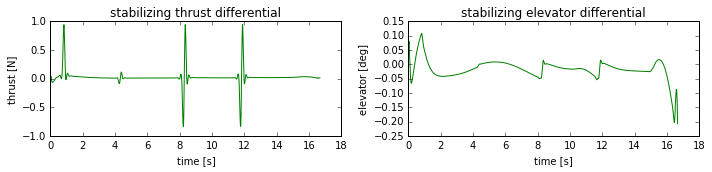

In [71]:
trajplot = simAndCompare(airplane, x0, compare=True)

In [120]:
knots_full = range(0,len(airplane.ttraj)-1,5)
knots_full = knots_full[::-1] # go backwards from goal
t0 = time.time()
rho_full = getRho(airplane, knots_full, False)
t1 = time.time()
print('sweep finished in %.2f seconds' % (t1-t0))

i:  0 , knot:  155 , rho:  0.0360406494141
i:  1 , knot:  150 , rho:  0.03796875
i:  2 , knot:  145 , rho:  0.0480541992188
i:  3 , knot:  140 , rho:  0.0405457305908
i:  4 , knot:  135 , rho:  0.0360406494141
i:  5 , knot:  130 , rho:  0.0360406494141
i:  6 , knot:  125 , rho:  0.0360406494141
i:  7 , knot:  120 , rho:  0.0360406494141
i:  8 , knot:  115 , rho:  0.0360406494141
i:  9 , knot:  110 , rho:  0.03796875
i:  10 , knot:  105 , rho:  0.0304092979431
i:  11 , knot:  100 , rho:  0.0360406494141
i:  12 , knot:  95 , rho:  0.0304092979431
i:  13 , knot:  90 , rho:  0.03796875
i:  14 , knot:  85 , rho:  0.0304092979431
i:  15 , knot:  80 , rho:  0.04271484375
i:  16 , knot:  75 , rho:  0.03375
i:  17 , knot:  70 , rho:  0.03796875
i:  18 , knot:  65 , rho:  0.0284765625
i:  19 , knot:  60 , rho:  0.03375
i:  20 , knot:  55 , rho:  0.03796875
i:  21 , knot:  50 , rho:  0.0320361328125
i:  22 , knot:  45 , rho:  0.0405457305908
i:  23 , knot:  40 , rho:  0.03796875
i:  24 , knot:  3

<IPython.core.display.Javascript object>


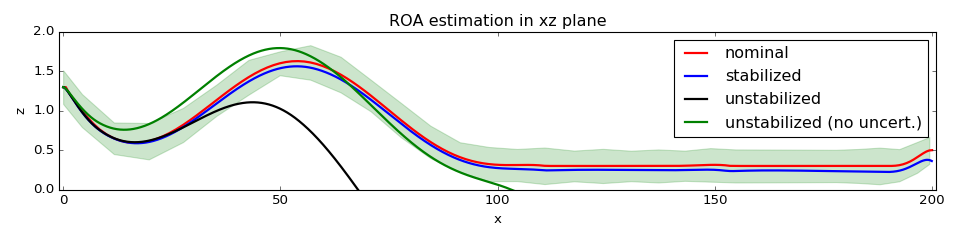

In [186]:
funnelplot = plotTrajFunnel(airplane, rho_full, knots_full)
funnelplot.legend(('nominal', 'stabilized', 'unstabilized', 'unstabilized (no uncert.)'))
# funnelplot.savefig('figs/funnel_traj2.png', dpi=300)
funnelplot.show()

In [60]:
horizontal_starts = np.arange(0,151,5)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
x0_sweep = np.zeros((horizontal_starts.shape[0], x0.shape[0]))
sys_sweep = []

for i, start in enumerate(horizontal_starts):
    x0_sweep[i,:] = x0
    x0_sweep[i,0] = start
    if np.mod(i, 2) == 0:
        x0_sweep[i,1] = x0[1] - 0.5

    sys = AirplaneSystem()
    utraj, xtraj, ttraj = sys.trajOpt(x0_sweep[i,:], dircol=0, second_pass=False)
    sys_sweep.append(sys)
    print 'i: ', i, ', tf: ', ttraj[-1]


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.8 seconds **

t_f computed: 16.667 seconds
cost computed: 3243.994
i:  0 , tf:  16.6666666667
Number of decision vars 1255
** solver begin with N = 156 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 11.1 seconds **

t_f computed: 16.250 seconds
cost computed: 2949.080
i:  1 , tf:  16.25
Number of decision vars 1223
** solver begin with N = 152 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 6.9 seconds **

t_f computed: 15.833 seconds
cost computed: 2899.850
i:  2 , tf:  15.8333333333
Number of decision vars 1191
** solver begin with N = 148 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.3 seconds **

t_f computed: 15.417 seconds
cost computed: 2647.841
i:  3 , tf:  15.4166666667
Number of decision vars 1159
** solver begin with N = 144 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 10.3 seconds **

t_f compute

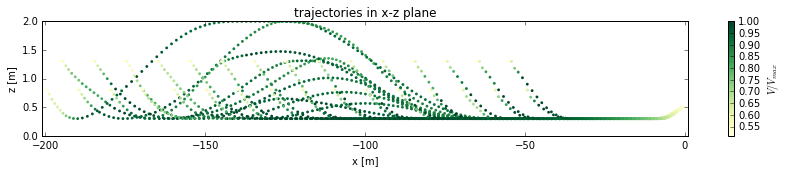

In [62]:
# plotMultipleTraj(sys_sweep, savefile='figs/traj_sweep_may16.png')

<IPython.core.display.Javascript object>


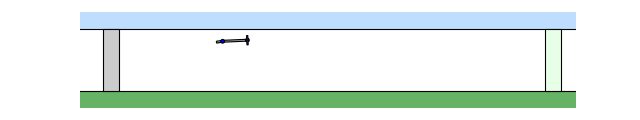

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


In [107]:
viz = urdfViz(airplane)
# viz.save('figs/urdfViz3.mp4', dpi=350)
# plt.close()
# HTML(viz.to_html5_video())

<IPython.core.display.Javascript object>


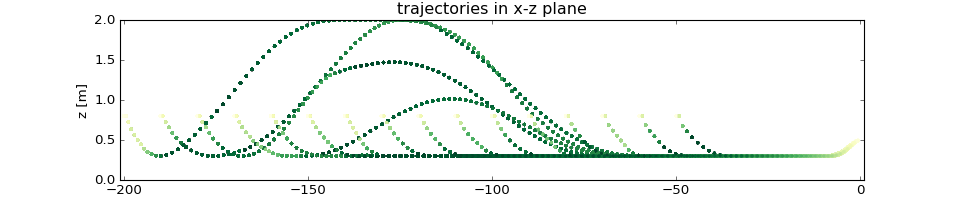

In [102]:
%matplotlib nbagg
animateMultipleTraj(sys_sweep[0::2], saveprefix='figs/even_step')

In [78]:
# do a simple RRT with obstacles
obs = np.array([[-100, 0, 10, 1.0], [-30, 0, 10, 1.0], [-160, 1.0, 10, 1.0]])
x0_rrt = np.array([-200.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
xg_rrt = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane_rrt = AirplaneSystem()
rrt = RRTStar(x0_rrt, xg_rrt, airplane_rrt, obs)
goal_node = rrt.run()

Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.4 seconds **

t_f computed: 16.667 seconds
cost computed: 3243.918
goal reachable from start but not obstacle free
i:  0
Number of decision vars 367
** solver begin with N = 45 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 8.426 seconds
cost computed: 1542.006
i:  1
Number of decision vars 719
** solver begin with N = 89 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.7 seconds **

t_f computed: 12.816 seconds
cost computed: 3251.152
i:  2
Number of decision vars 639
** solver begin with N = 79 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.7 seconds **

t_f computed: 11.128 seconds
cost computed: 2718.883
backwards nodes:  1 , forwards nodes:  0
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 9

cost computed: 301.361
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.319 seconds
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.096 seconds
Number of decision vars 375
** solver begin with N = 46 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 6.629 seconds
cost computed: 925.884
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.449 seconds
cost computed: 312.437
Number of decision vars 1023
** solver begin with N = 127 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.0 seconds **

t_f computed: 12.527 seconds
cost computed: 1537.274
i:  21
Number of decision vars 463
** solver begin with N = 57 **
SolutionResult.kS


t_f computed: 15.236 seconds
cost computed: 7257.676
Number of decision vars 767
** solver begin with N = 95 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 6.0 seconds **

t_f computed: 12.799 seconds
Number of decision vars 391
** solver begin with N = 48 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.1 seconds **

t_f computed: 9.203 seconds
cost computed: 1449.391
better path to new node found
Number of decision vars 487
** solver begin with N = 60 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.7 seconds **

t_f computed: 8.050 seconds
Number of decision vars 751
** solver begin with N = 93 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.3 seconds **

t_f computed: 14.625 seconds
cost computed: 6102.006
Number of decision vars 479
** solver begin with N = 59 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.4 seconds **

t_f computed: 11.146 seconds
cost computed: 2374.838
Number of decision v


t_f computed: 12.773 seconds
cost computed: 2236.510
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.328 seconds
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 9.640 seconds
cost computed: 1501.101
Number of decision vars 479
** solver begin with N = 59 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 7.110 seconds
cost computed: 477.399
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 8.556 seconds
cost computed: 609.271
better path to new node found
Number of decision vars 839
** solver begin with N = 104 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.3 seconds **

t_f computed: 12.532 seconds
cost computed: 2543.067
Number of


t_f computed: 4.790 seconds
cost computed: 687.659
Number of decision vars 871
** solver begin with N = 108 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.7 seconds **

t_f computed: 11.013 seconds
cost computed: 1616.956
i:  43
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.085 seconds
cost computed: 134.074
backwards nodes:  9 , forwards nodes:  9
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 10.052 seconds
cost computed: 1906.271
Number of decision vars 439
** solver begin with N = 54 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 7.345 seconds
cost computed: 469.873
better path to new node found
Number of decision vars 407
** solver begin with N = 50 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds 

** solver begin with N = 126 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.0 seconds **

t_f computed: 17.152 seconds
cost computed: 3660.926
Number of decision vars 183
** solver begin with N = 22 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.001 seconds
cost computed: 231.508
better path to new node found
Number of decision vars 983
** solver begin with N = 122 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.2 seconds **

t_f computed: 16.599 seconds
cost computed: 4956.690
Number of decision vars 911
** solver begin with N = 113 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.8 seconds **

t_f computed: 15.374 seconds
cost computed: 3794.799
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.253 seconds
cost computed: 17.346
better path to new node found
Number of decision vars 703
** solver begi

t_f computed: 11.158 seconds
cost computed: 2531.541
Number of decision vars 247
** solver begin with N = 30 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 3.049 seconds
cost computed: 308.644
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.482 seconds
cost computed: 182.778
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.374 seconds
cost computed: 214.449
i:  70
Number of decision vars 231
** solver begin with N = 28 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.473 seconds
i:  71
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 7.658 seconds
i:  72
Number of decision vars 407
** solve

** solver begin with N = 45 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.708 seconds
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.640 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.806 seconds
Number of decision vars 199
** solver begin with N = 24 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.834 seconds
Number of decision vars 351
** solver begin with N = 43 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.038 seconds
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.606 seconds
Number of decisi

i:  79
Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.5 seconds **

t_f computed: 7.944 seconds
i:  80
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.018 seconds
i:  81
Number of decision vars 159
** solver begin with N = 19 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.534 seconds
cost computed: 157.218
backwards nodes:  1 , forwards nodes:  19
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.595 seconds
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.568 seconds
cost computed: 43.824
better path through new node found
Number of decision vars 935
** s

cost computed: 501.298
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 9.040 seconds
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 9.949 seconds
Number of decision vars 431
** solver begin with N = 53 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 7.219 seconds
cost computed: 865.274
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.016 seconds
Number of decision vars 543
** solver begin with N = 67 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 7.836 seconds
cost computed: 501.298
i:  83
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kSolutionFound
** SNOPT

cost computed: 2830.221
Number of decision vars 343
** solver begin with N = 42 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 5.674 seconds
cost computed: 327.639
better path to new node found
Number of decision vars 503
** solver begin with N = 62 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 8.376 seconds
cost computed: 732.489
Number of decision vars 631
** solver begin with N = 78 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 10.535 seconds
cost computed: 2111.769
Number of decision vars 447
** solver begin with N = 55 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 7.414 seconds
cost computed: 823.586
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.109 seconds
Number of decision vars 127
** solver beg

Number of decision vars 415
** solver begin with N = 51 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 6.085 seconds
cost computed: 106.912
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.7 seconds **

t_f computed: 8.556 seconds
cost computed: 671.081
Number of decision vars 631
** solver begin with N = 78 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.8 seconds **

t_f computed: 10.619 seconds
cost computed: 1457.932
Number of decision vars 551
** solver begin with N = 68 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.7 seconds **

t_f computed: 8.739 seconds
cost computed: 959.718
Number of decision vars 743
** solver begin with N = 92 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.8 seconds **

t_f computed: 9.938 seconds
cost computed: 484.886
i:  99
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult

backwards nodes:  1 , forwards nodes:  24
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.678 seconds
Number of decision vars 1135
** solver begin with N = 141 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.6 seconds **

t_f computed: 13.463 seconds
cost computed: 1716.352
Number of decision vars 327
** solver begin with N = 40 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 8.370 seconds
cost computed: 1226.900
Number of decision vars 551
** solver begin with N = 68 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 8.991 seconds
cost computed: 1503.768
Number of decision vars 399
** solver begin with N = 49 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 4.553 seconds
cost computed: 433.093
Number of decision vars 1135
** solver begin with

SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 14.815 seconds
cost computed: 4075.233
Number of decision vars 551
** solver begin with N = 68 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 11.071 seconds
cost computed: 1913.862
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.314 seconds
cost computed: 108.107
Number of decision vars 183
** solver begin with N = 22 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.944 seconds
Number of decision vars 231
** solver begin with N = 28 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.542 seconds
Number of decision vars 343
** solver begin with N = 42 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 2.5 seconds **

t_f computed: 6.222 seco

t_f computed: 7.099 seconds
cost computed: 1076.180
Number of decision vars 815
** solver begin with N = 101 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.2 seconds **

t_f computed: 8.906 seconds
cost computed: 1185.263
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 5.946 seconds
cost computed: 546.206
Number of decision vars 519
** solver begin with N = 64 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 5.863 seconds
cost computed: 445.863
Number of decision vars 911
** solver begin with N = 113 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.4 seconds **

t_f computed: 9.787 seconds
cost computed: 1404.785
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.647 seconds
cost computed: 147.659
Number of decision vars 

cost computed: 586.408
Number of decision vars 495
** solver begin with N = 61 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.1 seconds **

t_f computed: 9.825 seconds
cost computed: 1267.997
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 7.635 seconds
cost computed: 0.459
Number of decision vars 559
** solver begin with N = 69 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 6.187 seconds
cost computed: 202.406
Number of decision vars 439
** solver begin with N = 54 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 8.794 seconds
cost computed: 871.016
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 7.635 seconds
cost computed: 0.459
Number of decision vars 575
** solver begin with N = 71 **
S

Number of decision vars 447
** solver begin with N = 55 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 6.584 seconds
cost computed: 0.931
i:  121
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.944 seconds
i:  122
Number of decision vars 463
** solver begin with N = 57 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 5.291 seconds
cost computed: 732.778
i:  123
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.529 seconds
cost computed: 102.002
backwards nodes:  1 , forwards nodes:  25
Number of decision vars 71
** solver begin with N = 8 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.883 seconds
Number of decision vars 95
** solver begin with N

cost computed: 1005.523
Number of decision vars 463
** solver begin with N = 57 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 8.390 seconds
cost computed: 779.265
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.483 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.308 seconds
Number of decision vars 487
** solver begin with N = 60 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 8.866 seconds
cost computed: 1216.723
Number of decision vars 687
** solver begin with N = 85 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 7.662 seconds
cost computed: 938.747
Number of decision vars 567
** solver begin with N = 70 **
SolutionResult.kSolutionFound


cost computed: 1899.863
Number of decision vars 1151
** solver begin with N = 143 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.4 seconds **

t_f computed: 16.420 seconds
cost computed: 4856.668
Number of decision vars 671
** solver begin with N = 83 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.6 seconds **

t_f computed: 9.569 seconds
cost computed: 2039.671
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.471 seconds
i:  128
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.761 seconds
cost computed: 131.415
backwards nodes:  9 , forwards nodes:  20
Number of decision vars 407
** solver begin with N = 50 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 5.606 seconds
cost computed: 693.414
Number of decision

cost computed: 285.159
Number of decision vars 415
** solver begin with N = 51 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 6.315 seconds
cost computed: 472.854
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.208 seconds
cost computed: 21.198
better path to new node found
Number of decision vars 519
** solver begin with N = 64 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 7.923 seconds
cost computed: 797.955
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.209 seconds
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 8.047 seconds
cost computed: 763.526
Number of decision vars 583
** solver begin

t_f computed: 7.683 seconds
cost computed: 1283.992
Number of decision vars 559
** solver begin with N = 69 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 12.048 seconds
cost computed: 2545.121
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.762 seconds
cost computed: 518.456
Number of decision vars 663
** solver begin with N = 82 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 14.318 seconds
cost computed: 3767.597
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.245 seconds
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 5.970 seconds
cost computed: 521.744
Number of decision vars 671
** solver beg

cost computed: 1083.024
Number of decision vars 887
** solver begin with N = 110 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 9.439 seconds
cost computed: 1196.085
Number of decision vars 767
** solver begin with N = 95 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.2 seconds **

t_f computed: 15.466 seconds
cost computed: 3792.143
Number of decision vars 903
** solver begin with N = 112 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.5 seconds **

t_f computed: 11.494 seconds
cost computed: 1083.024
Number of decision vars 791
** solver begin with N = 98 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.1 seconds **

t_f computed: 13.340 seconds
cost computed: 2683.774
Number of decision vars 823
** solver begin with N = 102 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 6.6 seconds **

t_f computed: 16.390 seconds
cost computed: 4475.963
Number of decision vars 863
** solver begin 

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.271 seconds
cost computed: 252.763
Number of decision vars 143
** solver begin with N = 17 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.380 seconds
cost computed: 72.819
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 7.700 seconds
cost computed: 511.818
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.651 seconds
Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 3.885 seconds
cost computed: 429.590
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.745 seco

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.632 seconds
cost computed: 175.920
better path through new node found
Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 7.334 seconds
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.902 seconds
Number of decision vars 391
** solver begin with N = 48 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 6.058 seconds
cost computed: 2.557
i:  151
Number of decision vars 303
** solver begin with N = 37 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 6.456 seconds
cost computed: 1013.812
i:  152
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished i

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.104 seconds
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.478 seconds
Number of decision vars 199
** solver begin with N = 24 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.517 seconds
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.703 seconds
Number of decision vars 375
** solver begin with N = 46 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.022 seconds
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.251 seconds
Number of decision vars 423
** solver begin w

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.441 seconds
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.668 seconds
cost computed: 237.824
better path to new node found
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.327 seconds
cost computed: 268.175
Number of decision vars 367
** solver begin with N = 45 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 6.467 seconds
cost computed: 758.614
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.635 seconds
cost computed: 123.482
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seco

Number of decision vars 255
** solver begin with N = 31 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 5.166 seconds
cost computed: 326.124
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 13.315 seconds
cost computed: 3011.205
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.057 seconds
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.328 seconds
cost computed: 279.818
better path to new node found
Number of decision vars 655
** solver begin with N = 81 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 13.482 seconds
cost computed: 2943.756
Number of decision vars 687
** solver begin with N = 85 **
Solu

** solver begin with N = 37 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 5.075 seconds
cost computed: 734.935
better path to new node found
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.807 seconds
cost computed: 91.275
better path to new node found
Number of decision vars 247
** solver begin with N = 30 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 4.112 seconds
cost computed: 513.124
Number of decision vars 455
** solver begin with N = 56 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 7.666 seconds
cost computed: 1132.514
Number of decision vars 159
** solver begin with N = 19 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.637 seconds
cost computed: 158.307
better path to new node found
Number of decision

** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 11.534 seconds
cost computed: 2658.559
Number of decision vars 775
** solver begin with N = 96 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.6 seconds **

t_f computed: 15.557 seconds
cost computed: 4146.702
Number of decision vars 487
** solver begin with N = 60 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 9.726 seconds
cost computed: 1505.877
Number of decision vars 879
** solver begin with N = 109 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.0 seconds **

t_f computed: 17.664 seconds
cost computed: 5427.605
Number of decision vars 295
** solver begin with N = 36 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 5.852 seconds
cost computed: 555.741
Number of decision vars 495
** solver begin with N = 61 **
SolutionResult.kSolutionFound
** SNOPT so

** solver begin with N = 141 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.4 seconds **

t_f computed: 15.694 seconds
cost computed: 3219.693
Number of decision vars 327
** solver begin with N = 40 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 8.370 seconds
cost computed: 1572.666
Number of decision vars 1135
** solver begin with N = 141 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.6 seconds **

t_f computed: 15.694 seconds
cost computed: 3219.693
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 7.469 seconds
cost computed: 1154.517
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.872 seconds
cost computed: 131.462
Number of decision vars 407
** solver begin with N = 50 **
SolutionResult.kSolutionFound
** SNOPT s

SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 5.504 seconds
cost computed: 742.881
Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.653 seconds
cost computed: 73.729
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.542 seconds
cost computed: 433.497
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.415 seconds
cost computed: 248.506
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.012 seconds
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.630 seco

** solver begin with N = 24 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 2.722 seconds
cost computed: 36.321
better path through new node found
Number of decision vars 391
** solver begin with N = 48 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 5.138 seconds
cost computed: 169.866
Number of decision vars 743
** solver begin with N = 92 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.6 seconds **

t_f computed: 11.823 seconds
cost computed: 1885.470
Number of decision vars 671
** solver begin with N = 83 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.9 seconds **

t_f computed: 16.086 seconds
cost computed: 4094.802
Number of decision vars 199
** solver begin with N = 24 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.833 seconds
cost computed: 132.317
better path through new node found
Number of decision vars 935
** solv

SolutionResult.kSolutionFound
** SNOPT solver finished in 2.8 seconds **

t_f computed: 7.219 seconds
cost computed: 1066.043
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.034 seconds
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.569 seconds
Number of decision vars 583
** solver begin with N = 72 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.7 seconds **

t_f computed: 9.414 seconds
cost computed: 2096.301
Number of decision vars 783
** solver begin with N = 97 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 12.664 seconds
cost computed: 2982.949
Number of decision vars 887
** solver begin with N = 110 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.9 seconds **

t_f computed: 14.383 seconds
cos

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.293 seconds
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.467 seconds
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.891 seconds
Number of decision vars 239
** solver begin with N = 29 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.491 seconds
cost computed: 0.389
i:  181
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.645 seconds
i:  182
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.121 seconds
i:  183
Number of 

SolutionResult.kSolutionFound
** SNOPT solver finished in 4.7 seconds **

t_f computed: 11.023 seconds
cost computed: 1596.819
Number of decision vars 631
** solver begin with N = 78 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.6 seconds **

t_f computed: 10.637 seconds
cost computed: 2349.487
Number of decision vars 1095
** solver begin with N = 136 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.6 seconds **

t_f computed: 18.504 seconds
cost computed: 6096.960
Number of decision vars 959
** solver begin with N = 119 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.7 seconds **

t_f computed: 19.284 seconds
cost computed: 6982.397
Number of decision vars 623
** solver begin with N = 77 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.1 seconds **

t_f computed: 10.181 seconds
cost computed: 2210.749
Number of decision vars 471
** solver begin with N = 58 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 secon

** solver begin with N = 104 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.2 seconds **

t_f computed: 8.943 seconds
cost computed: 1044.824
Number of decision vars 855
** solver begin with N = 106 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 11.101 seconds
cost computed: 924.975
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 7.144 seconds
cost computed: 684.374
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.118 seconds
cost computed: 496.391
Number of decision vars 687
** solver begin with N = 85 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.3 seconds **

t_f computed: 10.242 seconds
cost computed: 1247.353
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solv

Number of decision vars 799
** solver begin with N = 99 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 9.544 seconds
cost computed: 926.434
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.702 seconds
cost computed: 83.138
Number of decision vars 335
** solver begin with N = 41 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 4.557 seconds
cost computed: 154.160
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 4.454 seconds
cost computed: 258.783
Number of decision vars 495
** solver begin with N = 61 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.1 seconds **

t_f computed: 6.348 seconds
cost computed: 364.239
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSolutio

Number of decision vars 223
** solver begin with N = 27 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.741 seconds
cost computed: 129.439
Number of decision vars 1119
** solver begin with N = 139 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 4.8 seconds **

t_f computed: 13.951 seconds
Number of decision vars 1143
** solver begin with N = 142 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 3.2 seconds **

t_f computed: 13.841 seconds
Number of decision vars 199
** solver begin with N = 24 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.615 seconds
Number of decision vars 559
** solver begin with N = 69 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 9.429 seconds
cost computed: 576.235
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.

Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.315 seconds
i:  194
Number of decision vars 295
** solver begin with N = 36 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 7.842 seconds
cost computed: 917.322
i:  195
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.893 seconds
i:  196
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.719 seconds
cost computed: 1.911
i:  197
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.815 seconds
i:  198
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstra

SolutionResult.kSolutionFound
** SNOPT solver finished in 2.8 seconds **

t_f computed: 6.286 seconds
cost computed: 714.807
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.091 seconds
cost computed: 97.314
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.208 seconds
cost computed: 367.863
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.194 seconds
cost computed: 79.063
better path to new node found
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.664 seconds
cost computed: 169.717
Number of decision vars 375
** solver begin with N = 46 **
SolutionResult.kSolutionFound
** SNOPT solver finishe

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.043 seconds
cost computed: 118.032
Number of decision vars 295
** solver begin with N = 36 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.569 seconds
cost computed: 337.309
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.656 seconds
cost computed: 32.077
better path to new node found
Number of decision vars 399
** solver begin with N = 49 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 4.755 seconds
cost computed: 686.463
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.955 seconds
cost computed: 13.544
better path to new node found
Number of decision vars 431
** solver begin with N = 53 **
SolutionResult.kSolutionFo

Number of decision vars 607
** solver begin with N = 75 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 6.678 seconds
cost computed: 1062.978
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.115 seconds
cost computed: 73.380
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 2.948 seconds
cost computed: 213.190
Number of decision vars 143
** solver begin with N = 17 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.741 seconds
cost computed: 53.142
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 8.388 seconds
cost computed: 131.137
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kSolutio

Number of decision vars 583
** solver begin with N = 72 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.4 seconds **

t_f computed: 8.069 seconds
cost computed: 426.823
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.001 seconds
cost computed: 35.042
Number of decision vars 791
** solver begin with N = 98 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.2 seconds **

t_f computed: 13.334 seconds
cost computed: 2519.329
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.176 seconds
cost computed: 450.349
Number of decision vars 167
** solver begin with N = 20 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.109 seconds
cost computed: 98.425
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSoluti

t_f computed: 30.875 seconds
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.949 seconds
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.358 seconds
Number of decision vars 831
** solver begin with N = 103 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 3.5 seconds **

t_f computed: 30.778 seconds
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 7.317 seconds
Number of decision vars 367
** solver begin with N = 45 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.5 seconds **

t_f computed: 14.390 seconds
Number of decision vars 343
** solver begin with N = 42 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in

** solver begin with N = 35 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 6.293 seconds
cost computed: 619.829
Number of decision vars 1159
** solver begin with N = 144 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.3 seconds **

t_f computed: 13.300 seconds
cost computed: 1989.187
Number of decision vars 839
** solver begin with N = 104 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.5 seconds **

t_f computed: 10.936 seconds
cost computed: 2191.980
Number of decision vars 343
** solver begin with N = 42 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 8.089 seconds
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.013 seconds
cost computed: 80.880
better path through new node found
Number of decision vars 615
** solver begin with N = 76 **
SolutionResult.kSolutio


t_f computed: 14.853 seconds
cost computed: 4147.177
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.500 seconds
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.288 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.557 seconds
Number of decision vars 471
** solver begin with N = 58 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 7.878 seconds
cost computed: 1102.921
Number of decision vars 303
** solver begin with N = 37 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.803 seconds
cost computed: 494.239
Number of decision vars 1023
** solver begin with N = 127 **
SolutionResult.

t_f computed: 3.482 seconds
cost computed: 178.643
i:  233
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.708 seconds
i:  234
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 5.731 seconds
cost computed: 467.793
backwards nodes:  19 , forwards nodes:  32
Number of decision vars 431
** solver begin with N = 53 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.4 seconds **

t_f computed: 9.204 seconds
cost computed: 1558.421
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.905 seconds
cost computed: 450.581
Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 6.610 seconds
cost co

cost computed: 3886.367
Number of decision vars 463
** solver begin with N = 57 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 6.237 seconds
cost computed: 693.262
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.647 seconds
cost computed: 165.337
Number of decision vars 471
** solver begin with N = 58 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 5.603 seconds
cost computed: 815.482
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 7.363 seconds
cost computed: 806.680
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.176 seconds
cost computed: 405.327
Number of decision vars 495
** solver begin with N = 61 

t_f computed: 9.895 seconds
cost computed: 942.734
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 3.238 seconds
cost computed: 225.046
better path through new node found
Number of decision vars 751
** solver begin with N = 93 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.0 seconds **

t_f computed: 15.105 seconds
cost computed: 7154.010
Number of decision vars 367
** solver begin with N = 45 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 4.855 seconds
cost computed: 293.293
Number of decision vars 1111
** solver begin with N = 138 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.0 seconds **

t_f computed: 13.240 seconds
cost computed: 1658.025
i:  240
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.726 secon

t_f computed: 16.230 seconds
cost computed: 6983.835
Number of decision vars 791
** solver begin with N = 98 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 15.144 seconds
cost computed: 5985.948
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 10.576 seconds
cost computed: 2041.133
Number of decision vars 327
** solver begin with N = 40 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.628 seconds
cost computed: 471.955
Number of decision vars 831
** solver begin with N = 103 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.3 seconds **

t_f computed: 10.314 seconds
cost computed: 960.672
Number of decision vars 639
** solver begin with N = 79 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 13.149 seconds
cost computed: 2692.959
Number of decision 


t_f computed: 5.222 seconds
cost computed: 725.206
backwards nodes:  67 , forwards nodes:  1
Number of decision vars 1127
** solver begin with N = 140 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.7 seconds **

t_f computed: 18.132 seconds
cost computed: 7727.407
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.694 seconds
Number of decision vars 655
** solver begin with N = 81 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 10.989 seconds
cost computed: 3215.114
Number of decision vars 719
** solver begin with N = 89 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.8 seconds **

t_f computed: 11.978 seconds
cost computed: 3842.824
Number of decision vars 167
** solver begin with N = 20 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.490 seconds
Number o

SolutionResult.kSolutionFound
** SNOPT solver finished in 9.1 seconds **

t_f computed: 15.777 seconds
cost computed: 5687.119
Number of decision vars 1047
** solver begin with N = 130 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.8 seconds **

t_f computed: 16.938 seconds
cost computed: 6880.473
Number of decision vars 535
** solver begin with N = 66 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.7 seconds **

t_f computed: 9.146 seconds
cost computed: 2068.820
Number of decision vars 703
** solver begin with N = 87 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.0 seconds **

t_f computed: 11.978 seconds
cost computed: 3130.503
Number of decision vars 239
** solver begin with N = 29 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.159 seconds
cost computed: 598.492
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 sec

** solver begin with N = 53 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 6.219 seconds
cost computed: 301.335
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 5.945 seconds
cost computed: 1.100
Number of decision vars 351
** solver begin with N = 43 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 5.393 seconds
cost computed: 459.181
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 5.604 seconds
cost computed: 311.643
Number of decision vars 463
** solver begin with N = 57 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 6.695 seconds
cost computed: 635.835
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kInfeasibleConstraints
** SNOPT solv

** solver begin with N = 51 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 6.001 seconds
cost computed: 542.387
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.919 seconds
cost computed: 209.140
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 17.133 seconds
cost computed: 5914.779
Number of decision vars 591
** solver begin with N = 73 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 9.934 seconds
cost computed: 2750.702
Number of decision vars 743
** solver begin with N = 92 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.3 seconds **

t_f computed: 9.642 seconds
cost computed: 1212.209
i:  268
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
*


t_f computed: 9.769 seconds
cost computed: 2078.193
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 4.129 seconds
cost computed: 486.637
Number of decision vars 551
** solver begin with N = 68 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 5.952 seconds
cost computed: 736.529
Number of decision vars 439
** solver begin with N = 54 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 4.741 seconds
cost computed: 392.926
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 0.975 seconds
cost computed: 44.731
better path to new node found
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.514 seconds
Number of decisi

Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.921 seconds
cost computed: 358.436
Number of decision vars 615
** solver begin with N = 76 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 9.121 seconds
cost computed: 1809.812
Number of decision vars 175
** solver begin with N = 21 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.567 seconds
cost computed: 270.590
Number of decision vars 183
** solver begin with N = 22 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.493 seconds
Number of decision vars 567
** solver begin with N = 70 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 8.471 seconds
cost computed: 1150.620
Number of decision vars 543
** solver begin with N = 67 **
SolutionResult.kSolutionFound
** S

Number of decision vars 431
** solver begin with N = 53 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 7.596 seconds
cost computed: 727.779
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.411 seconds
Number of decision vars 447
** solver begin with N = 55 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.4 seconds **

t_f computed: 7.883 seconds
cost computed: 832.887
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.999 seconds
Number of decision vars 335
** solver begin with N = 41 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 5.877 seconds
cost computed: 468.270
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver fin

** solver begin with N = 16 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.405 seconds
cost computed: 45.675
better path through new node found
Number of decision vars 343
** solver begin with N = 42 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 5.722 seconds
cost computed: 599.445
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 6.349 seconds
cost computed: 640.127
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.075 seconds
Number of decision vars 71
** solver begin with N = 8 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 0.886 seconds
cost computed: 61.193
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SN

Number of decision vars 255
** solver begin with N = 31 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.683 seconds
cost computed: 376.551
Number of decision vars 479
** solver begin with N = 59 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.8 seconds **

t_f computed: 10.971 seconds
cost computed: 2824.310
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.763 seconds
cost computed: 576.037
Number of decision vars 655
** solver begin with N = 81 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 13.048 seconds
cost computed: 2987.527
Number of decision vars 695
** solver begin with N = 86 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 9.904 seconds
cost computed: 2205.064
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.k

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.773 seconds
Number of decision vars 759
** solver begin with N = 94 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.0 seconds **

t_f computed: 12.669 seconds
Number of decision vars 975
** solver begin with N = 121 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 3.0 seconds **

t_f computed: 16.851 seconds
Number of decision vars 767
** solver begin with N = 95 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 19.3 seconds **

t_f computed: 12.804 seconds
Number of decision vars 335
** solver begin with N = 41 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 5.526 seconds
Number of decision vars 1151
** solver begin with N = 143 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.7 seconds **

t_f computed: 12.626 seconds
Number of decision vars 1199
** solve

Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.8 seconds **

t_f computed: 10.567 seconds
Number of decision vars 495
** solver begin with N = 61 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.9 seconds **

t_f computed: 8.166 seconds
Number of decision vars 927
** solver begin with N = 115 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.6 seconds **

t_f computed: 10.031 seconds
cost computed: 1787.199
Number of decision vars 1231
** solver begin with N = 153 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.8 seconds **

t_f computed: 13.509 seconds
cost computed: 1951.581
Number of decision vars 679
** solver begin with N = 84 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.8 seconds **

t_f computed: 9.259 seconds
Number of decision vars 983
** solver begin with N = 122 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver fin

Number of decision vars 783
** solver begin with N = 97 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.4 seconds **

t_f computed: 10.370 seconds
cost computed: 897.674
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.865 seconds
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.348 seconds
Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.740 seconds
cost computed: 516.541
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 11.914 seconds
cost computed: 3223.120
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finish

In [79]:
urrt, xrrt, trrt = rrt.reconstruct_path(rrt.best_goal_node)

Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.112 seconds
cost computed: 70.446
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.975 seconds
cost computed: 44.731
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 2.512 seconds
cost computed: 55.327
Number of decision vars 143
** solver begin with N = 17 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.700 seconds
cost computed: 50.719
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 0.979 seconds
cost computed: 15.162
Number of decision vars 71
** solver begin with N = 8 **
SolutionResult.kSolutionFound
*

<IPython.core.display.Javascript object>


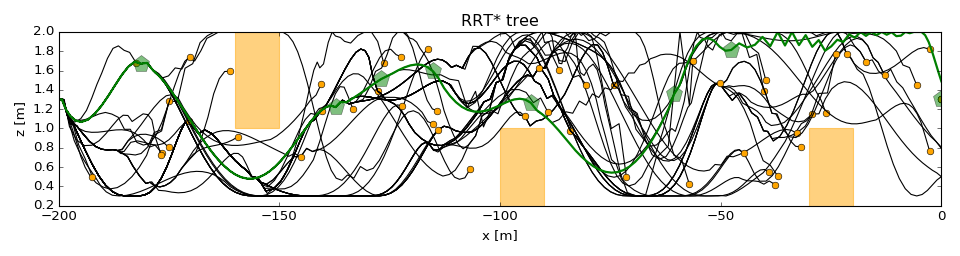

leaf_nodes length:  55
Number of decision vars 399
** solver begin with N = 49 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 5.782 seconds
cost computed: 159.675
Number of decision vars 639
** solver begin with N = 79 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.8 seconds **

t_f computed: 11.128 seconds
cost computed: 2718.883

total cost of RRT* path:  518.943763174
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.362 seconds
cost computed: 1.107
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.570 seconds
cost computed: 98.427
Number of decision vars 359
** solver begin with N = 44 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.225 seconds
cost computed: 134.047
Number of decisio

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.674 seconds
cost computed: 512.228
Number of decision vars 223
** solver begin with N = 27 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 3.608 seconds
cost computed: 89.039
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.697 seconds
cost computed: 1.673
Number of decision vars 175
** solver begin with N = 21 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.034 seconds
cost computed: 350.835
Number of decision vars 183
** solver begin with N = 22 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.215 seconds
cost computed: 327.573
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f comput

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 5.602 seconds
cost computed: 424.763
Number of decision vars 159
** solver begin with N = 19 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.136 seconds
cost computed: 68.399
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.909 seconds
cost computed: 73.973
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.669 seconds
cost computed: 178.290

total cost of RRT* path:  518.943763174
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.716 seconds
cost computed: 122.609
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT sol


total cost of RRT* path:  518.943763174
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.688 seconds
cost computed: 240.432

total cost of RRT* path:  518.943763174
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.229 seconds
cost computed: 187.924

total cost of RRT* path:  518.943763174
Number of decision vars 199
** solver begin with N = 24 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 2.722 seconds
cost computed: 36.321
Number of decision vars 71
** solver begin with N = 8 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.035 seconds
cost computed: 81.681
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed:

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.909 seconds
cost computed: 73.973
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.669 seconds
cost computed: 178.290

total cost of RRT* path:  518.943763174
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.440 seconds
cost computed: 32.024
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.529 seconds
cost computed: 102.002

total cost of RRT* path:  518.943763174
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 8.137 seconds
cost computed: 2483.684
Number of decision vars 79
** solver begin with N = 9 **
Sol

Number of decision vars 423
** solver begin with N = 52 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 6.083 seconds
cost computed: 15.285
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.669 seconds
cost computed: 178.290

total cost of RRT* path:  518.943763174
Number of decision vars 175
** solver begin with N = 21 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 2.576 seconds
cost computed: 238.565
Number of decision vars 159
** solver begin with N = 19 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.136 seconds
cost computed: 68.399
Number of decision vars 287
** solver begin with N = 35 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.909 seconds
cost computed: 73.973
Number of decision vars 119
** solver begi

In [105]:
treeplot_rrt = rrtPlot(rrt)

trajectory-following simulations finished


<IPython.core.display.Javascript object>


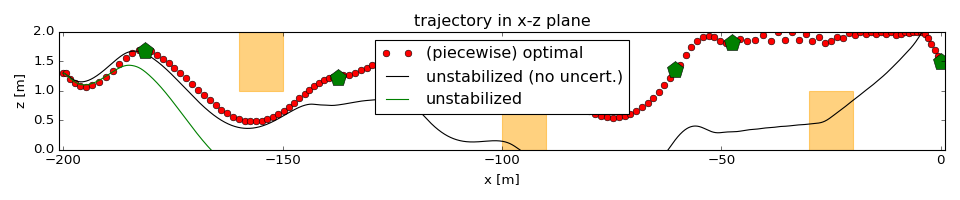

<IPython.core.display.Javascript object>


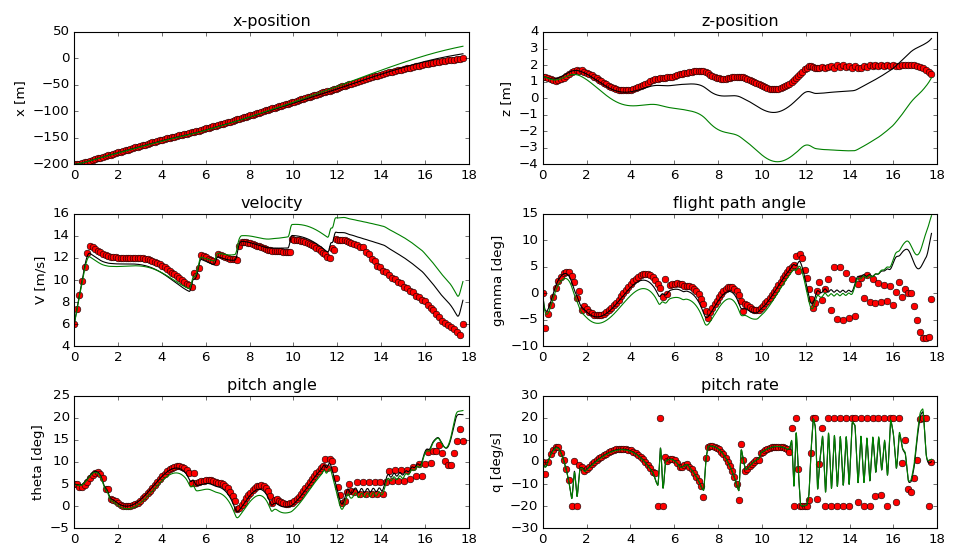

<IPython.core.display.Javascript object>


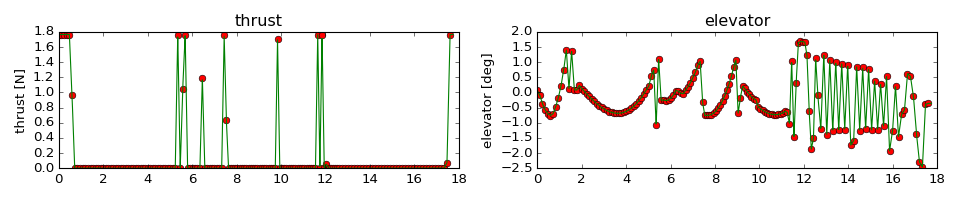

In [81]:
%matplotlib nbagg
trajplot_rrt = simAndCompare(rrt.plant, x0_rrt, obs=obs, goalnode=rrt.best_goal_node, compare=True)

<IPython.core.display.Javascript object>


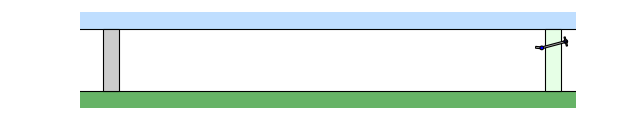

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


In [106]:
viz = urdfViz(rrt.plant)
# plt.close()
# HTML(viz.to_html5_video())

In [5]:
t = 140 # index of simulation run
rho_test = getRho(airplane, t, False)

rho:  53.5232468359
rho:  40.1424351269
rho:  30.1068263452
rho:  22.5801197589
rho:  16.9350898192
rho:  12.7013173644
rho:  9.52598802328
rho:  7.14449101746
rho:  5.3583682631
rho:  4.01877619732
rho:  3.01408214799
rho:  2.26056161099
rho:  1.69542120825
rho:  1.27156590618
rho:  0.953674429638
i:  0 , knot:  140 , rho:  53.5232468359
